# Motor Trend Car Road Tests
Description
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). 
Usage mtcars
Format
A data frame with 32 observations on 11 (numeric) variables. 
[, 1] mpg Miles/(US) gallon 
[, 2] cyl Number of cylinders 
[, 3] disp Displacement (cu.in.) 
[, 4] hp Gross horsepower 
[, 5] drat Rear axle ratio 
[, 6] wt Weight (1000 lbs) 
[, 7] qsec 1/4 mile time 
[, 8] vs Engine (0 = V-shaped, 1 = straight) 
[, 9] am Transmission (0 = automatic, 1 = manual) 
[,10] gear Number of forward gears 
[,11] carb Number of carburetors 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import scipy 
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.neighbors import NearestNeighbors

In [2]:
%matplotlib inline

In [3]:
missing = np.nan

In [4]:
address='mtcars.csv'
cars=pd.read_csv(address)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
cars_groups = cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


In [6]:
print(cars.keys())

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


In [7]:
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

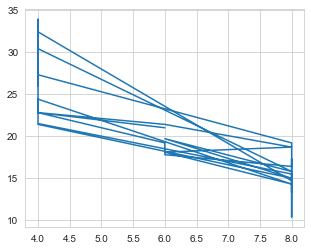

In [8]:
plt.plot(cars.cyl,cars.mpg)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Unnamed: 0    32 non-null object
mpg           32 non-null float64
cyl           32 non-null int64
disp          32 non-null float64
hp            32 non-null int64
drat          32 non-null float64
wt            32 non-null float64
qsec          32 non-null float64
vs            32 non-null int64
am            32 non-null int64
gear          32 non-null int64
carb          32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


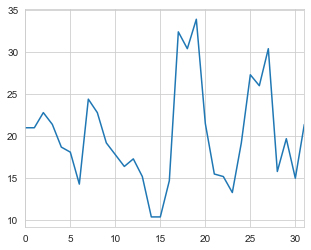

In [10]:
mpg = cars['mpg']
mpg.plot()

In [11]:
df_cars = cars[['cyl', 'wt', 'mpg']]
df_cars.head()

,cyl,wt,mpg
0,6,2.620,21.0
1,6,2.875,21.0
2,4,2.320,22.8
3,6,3.215,21.4
4,8,3.440,18.7


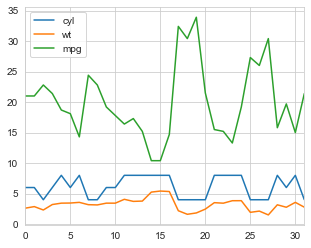

In [12]:
df_cars.plot()

<BarContainer object of 32 artists>

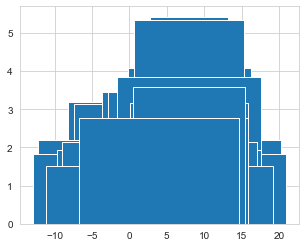

In [13]:
plt.bar(df_cars.cyl,df_cars.wt,df_cars.mpg)

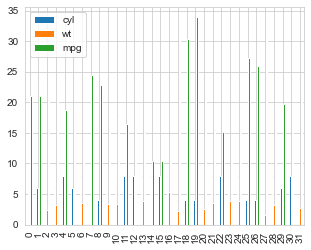

In [14]:
df_cars.plot(kind='bar')

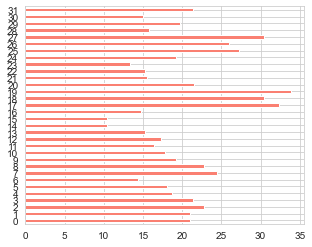

In [15]:
color = ['salmon']
mpg.plot(kind='barh', color = color)

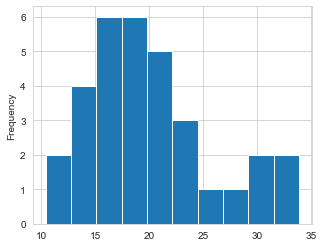

In [16]:
mpg.plot(kind='hist')

[]

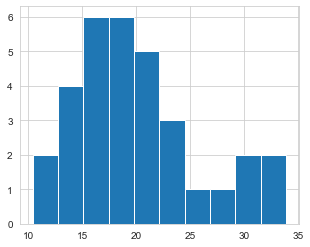

In [17]:
plt.hist(mpg)
plt.plot()

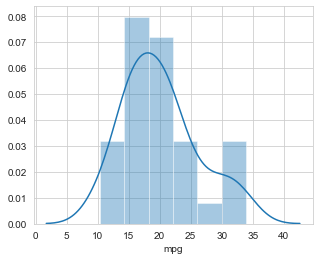

In [18]:
sb.distplot(mpg)

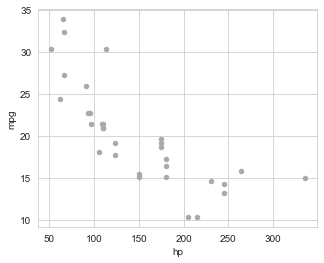

In [19]:
cars.plot(kind = 'scatter',x = 'hp', y='mpg', c =['darkgray'])

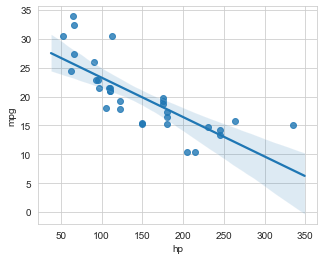

In [20]:
sb.regplot(x = 'hp', y='mpg', data=cars, scatter=True)

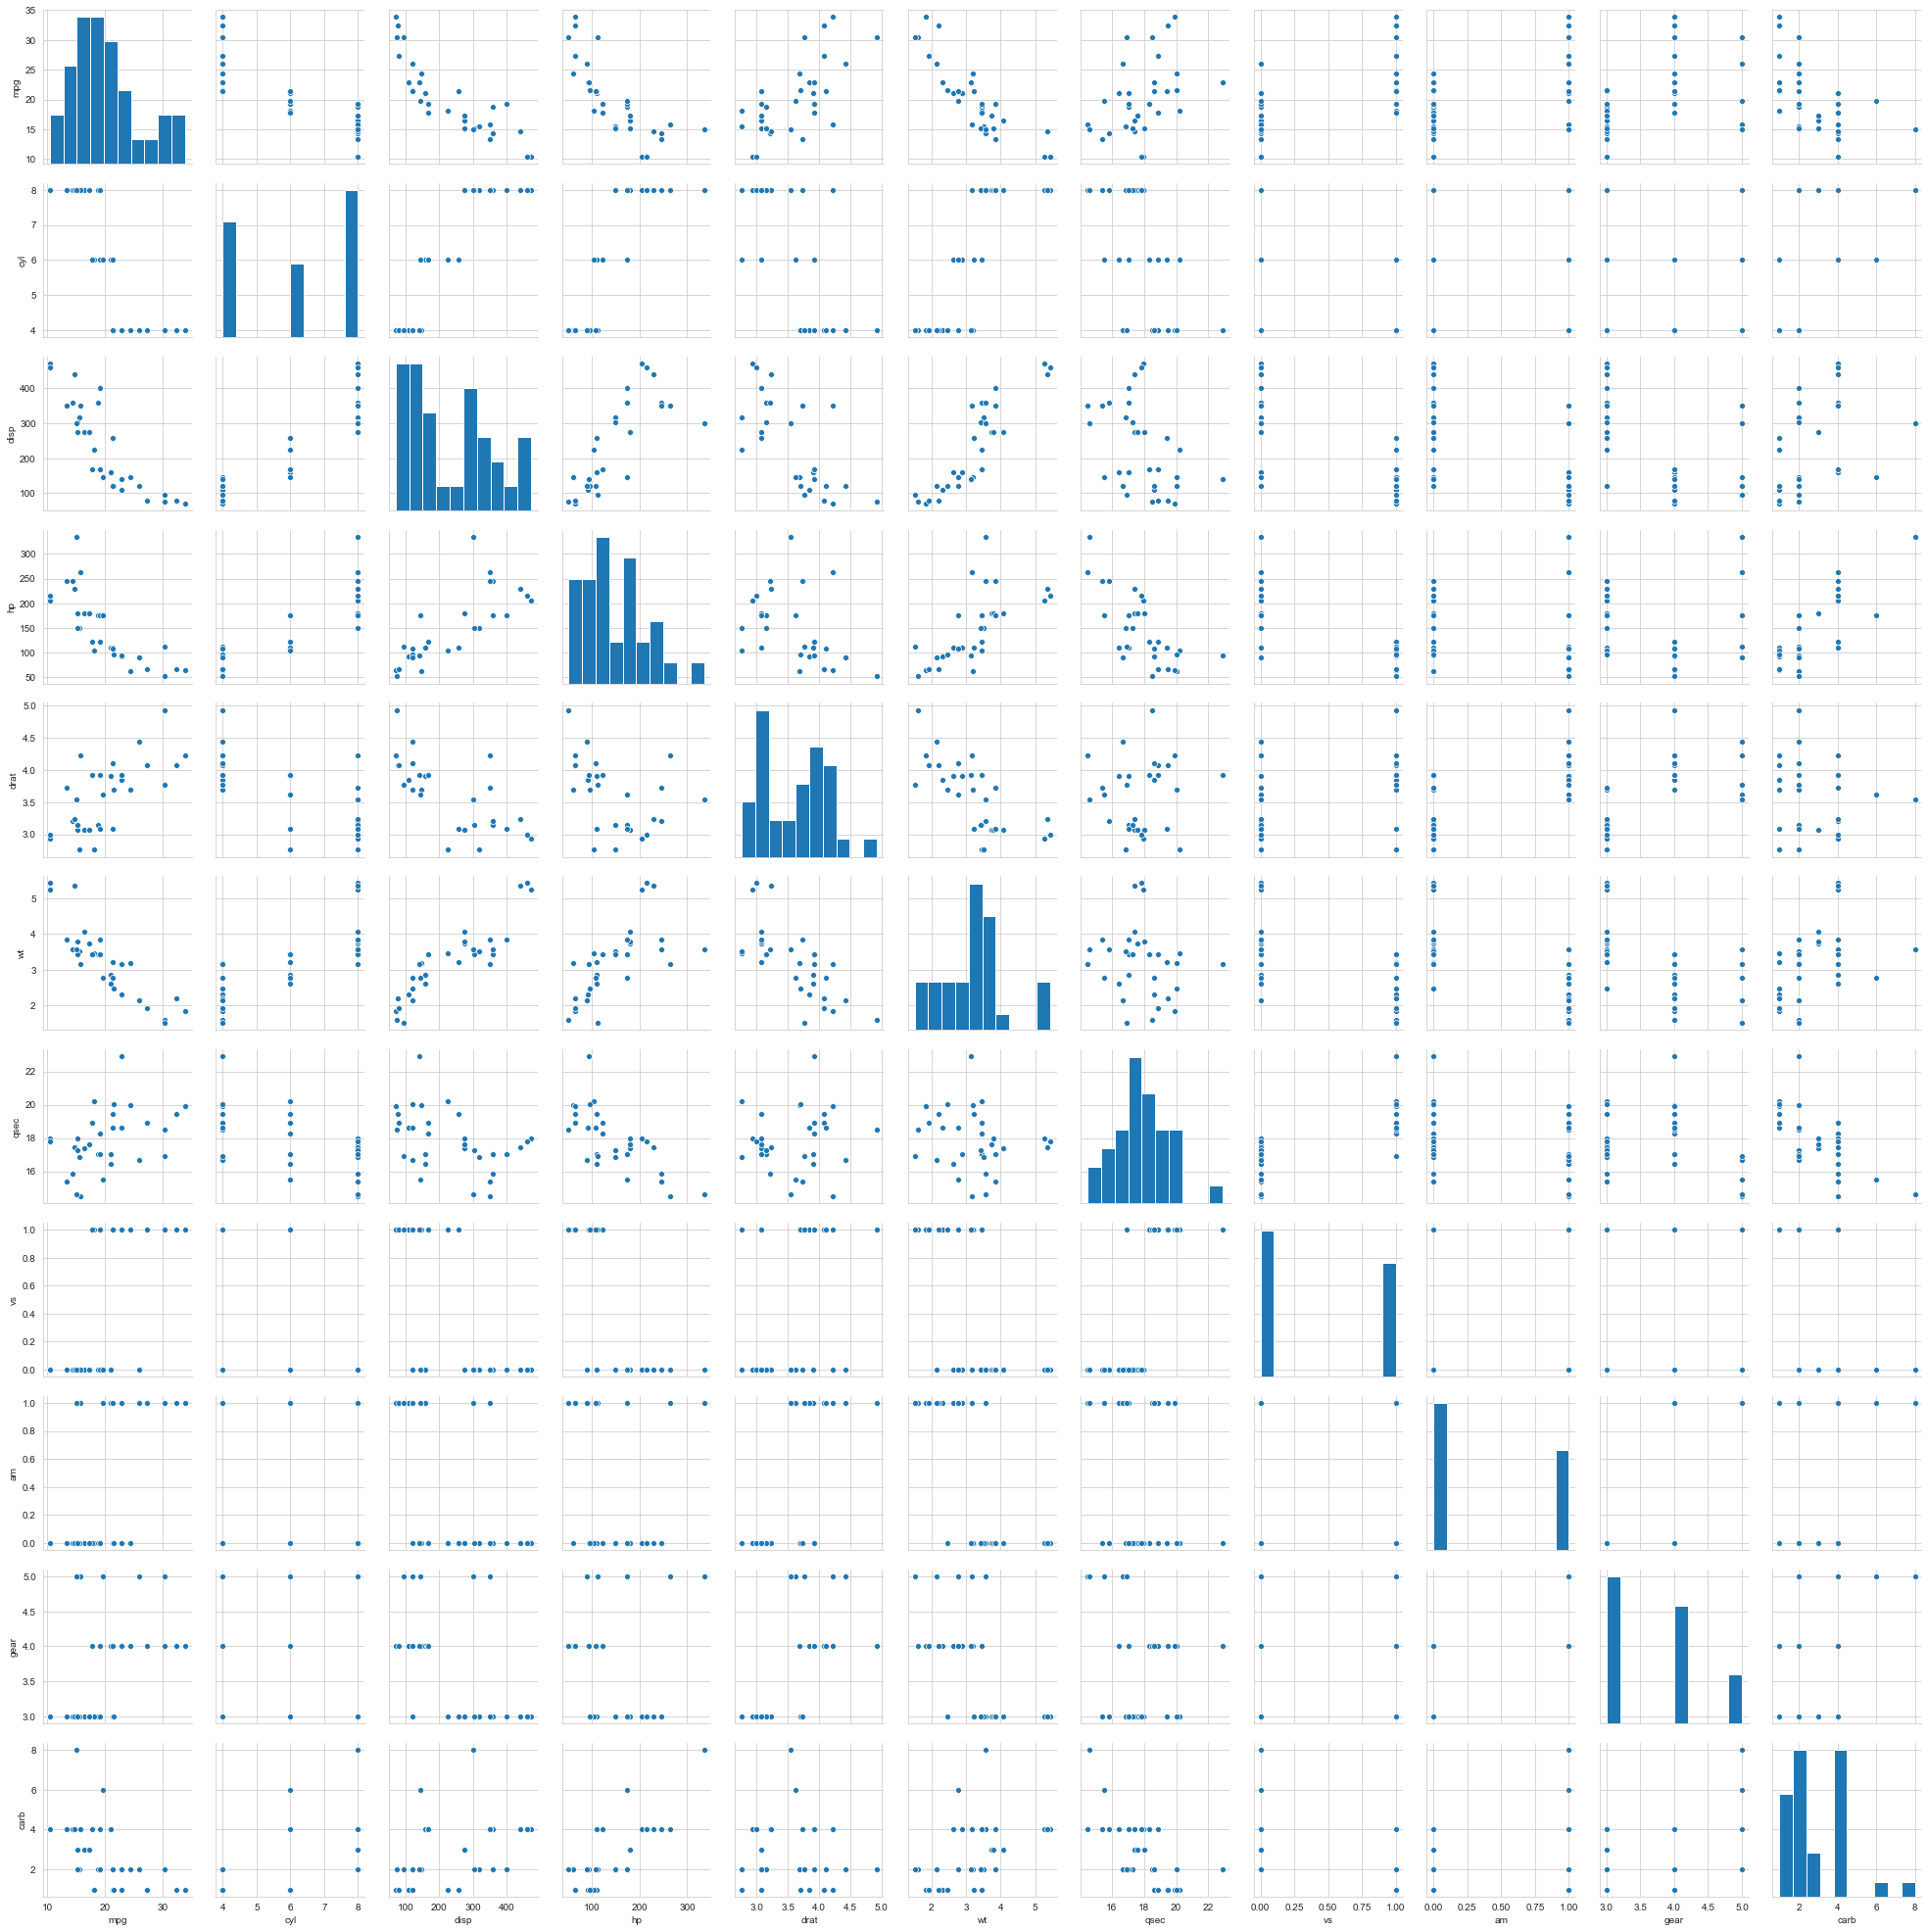

In [21]:
sb.pairplot(cars)

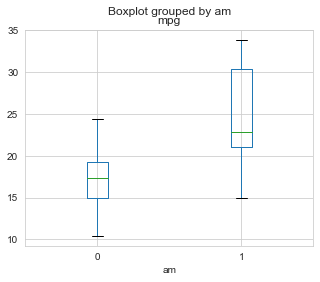

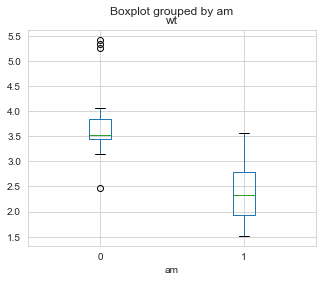

In [22]:
cars.boxplot(column = 'mpg', by = 'am')
cars.boxplot(column = 'wt', by = 'am')

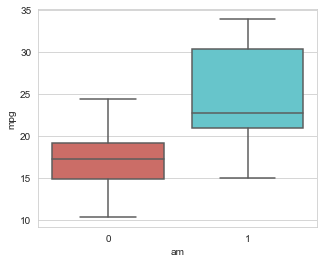

In [23]:
sb.boxplot(x='am', y='mpg', data = cars, palette ='hls')

In [24]:
cars.sum()

Unnamed: 0    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                       642.9
cyl                                                         198
disp                                                     7383.1
hp                                                         4694
drat                                                     115.09
wt                                                      102.952
qsec                                                     571.16
vs                                                           14
am                                                           13
gear                                                        118
carb                                                         90
dtype: object

In [25]:
cars.sum(axis=1)

0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [26]:
cars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [27]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [28]:
cars.max()

Unnamed: 0    Volvo 142E
mpg                 33.9
cyl                    8
disp                 472
hp                   335
drat                4.93
wt                 5.424
qsec                22.9
vs                     1
am                     1
gear                   5
carb                   8
dtype: object

In [29]:
mpg=cars.mpg
mpg.idxmax()

19

In [30]:
cars.values[19]

array(['Toyota Corolla', 33.9, 4, 71.1, 65, 4.22, 1.835, 19.9, 1, 1, 4, 1],
      dtype=object)

In [31]:
cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [32]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [33]:
gear = cars.gear
gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [34]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [35]:
carb=cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [36]:
cars_cat = cars[['cyl','vs','am','gear','carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
0,6,0,1,4,4
1,6,0,1,4,4
2,4,1,1,4,1
3,6,1,0,3,1
4,8,0,0,3,2


In [37]:
gears_grp = cars_cat.groupby('gear')
gears_grp.describe()

cyl                                                 vs            ...  \
     count      mean       std  min  25%  50%  75%  max count      mean  ...   
gear                                                                     ...   
3     15.0  7.466667  1.187234  4.0  8.0  8.0  8.0  8.0  15.0  0.200000  ...   
4     12.0  4.666667  0.984732  4.0  4.0  4.0  6.0  6.0  12.0  0.833333  ...   
5      5.0  6.000000  2.000000  4.0  4.0  6.0  8.0  8.0   5.0  0.200000  ...   

       am       carb                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     0.0  0.0  15.0  2.666667  1.175139  1.0  2.0  3.0  4.0  4.0  
4     1.0  1.0  12.0  2.333333  1.302678  1.0  1.0  2.0  4.0  4.0  
5     1.0  1.0   5.0  4.400000  2.607681  2.0  2.0  4.0  6.0  8.0  

[3 rows x 32 columns]

In [38]:
cars['group']=pd.Series(cars.gear, dtype ="category")
cars['group'].dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [39]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

In [40]:
pd.crosstab(cars['am'], cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


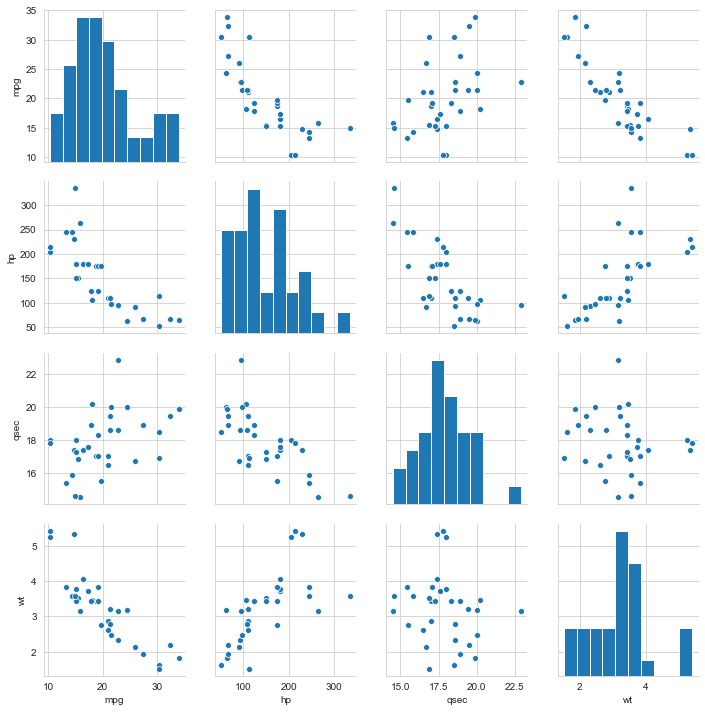

In [41]:
x =cars[['mpg', 'hp','qsec','wt']]
sb.pairplot(x)

In [42]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt=cars['wt']
pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print('PearsonR Correlation Coefficient %0.3f' %(pearsonr_coefficient))

PearsonR Correlation Coefficient -0.776


In [43]:
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print('PearsonR Correlation Coefficient %0.3f' %(pearsonr_coefficient))

PearsonR Correlation Coefficient 0.419


In [44]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print('PearsonR Correlation Coefficient %0.3f' %(pearsonr_coefficient))

PearsonR Correlation Coefficient -0.868


In [45]:
corr = x.corr()

In [46]:
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


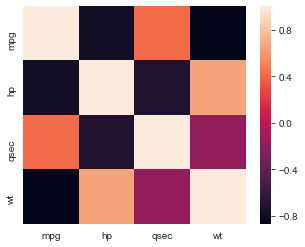

In [47]:
sb.heatmap(corr)

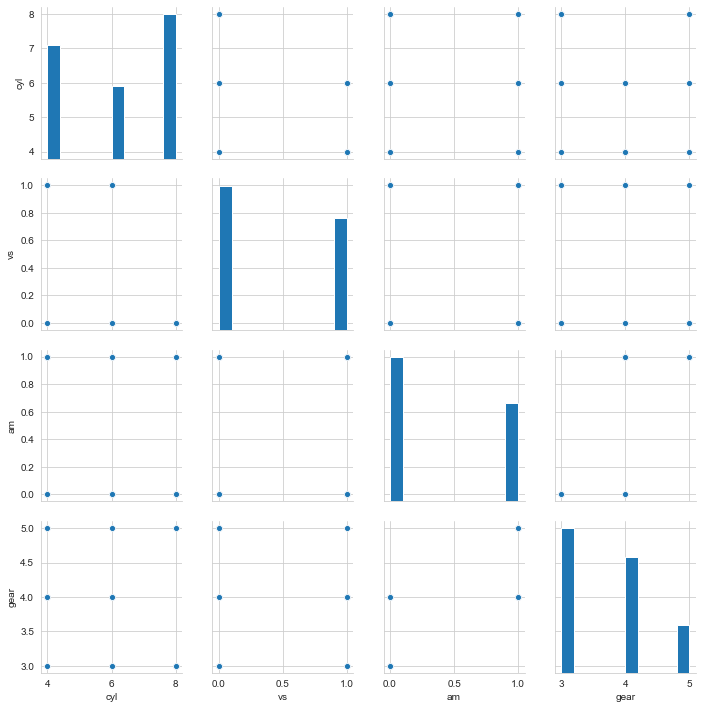

In [48]:
y = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(y)

In [49]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear=cars['gear']
spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print('SpearmanR Correlation Coefficient %0.3f' %(spearmanr_coefficient))

SpearmanR Correlation Coefficient -0.814


In [50]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print('SpearmanR Correlation Coefficient %0.3f' %(spearmanr_coefficient))

SpearmanR Correlation Coefficient -0.522


In [51]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)
print('SpearmanR Correlation Coefficient %0.3f' %(spearmanr_coefficient))

SpearmanR Correlation Coefficient -0.564


In [52]:
table = pd.crosstab(cyl, am)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 8.741 p_value 0.013


In [53]:
table = pd.crosstab(cyl, vs)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 21.340 p_value 0.000


In [54]:
table = pd.crosstab(cyl, gear)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 18.036 p_value 0.001


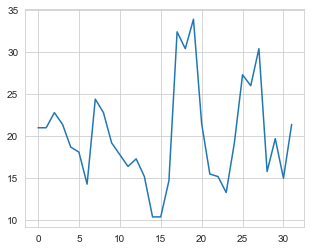

In [55]:
plt.plot(mpg)

In [56]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


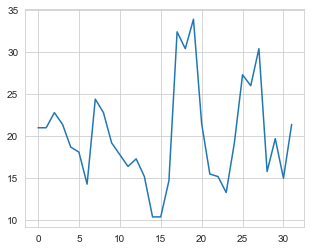

In [57]:
standardized_mpg = scale(mpg, axis = 0, with_mean = False, with_std = False)
plt.plot(standardized_mpg)

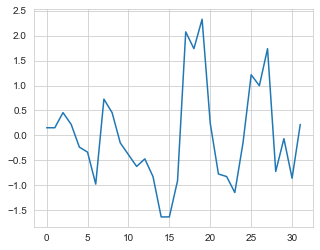

In [58]:
standardized_mpg = scale(mpg)
plt.plot(standardized_mpg)

In [59]:
lm = LinearRegression()                                             # Regression object created
datamt = np.matrix(cars)                                            # Matrix of data made
lmFit = lm.fit(datamt[:,3], datamt[:,1])                            # Data fit
print('Coefficients: \n', lmFit.coef_, '    ', lmFit.intercept_)    # Coefficients shown

Coefficients: 
 [[-0.04121512]]      [29.59985476]


In [60]:
lmm = LinearRegression()                                              # Regression object created
wtnp = np.array(cars['wt'])                                           # wt variable in an array
cylnp = np.array(cars['cyl'])                                         # cyl variable in an array
carbnp = np.array(cars['carb'])                                       # carb variable in an array
npc = np.column_stack((cylnp, wtnp, carbnp))                          # Arrays connected into one frame
npcmt = np.matrix(npc)                                                # Connected array made into a matrix
lmFit2 = lmm.fit(npcmt, datamt[:,4])                                  # Fit created
print('Coefficients: \n', lmFit2.coef_, '    ', lmFit2.intercept_)    # Coefficients shown


Coefficients: 
 [[23.18269752  0.14411948 18.28279627]]      [-48.63947381]


# Content-Based Recommender System 
we're going to use an unsupervised classifier, the nearest neighbor algorithm to build a content-based recommender

A customer is looking for a car that weighs 3.2 tons, gets at least 15 miles per gallon, has an engine with a displacement size of 300 cubic inches, and a power of 160 horsepower.

In [61]:
t = [15, 300, 160, 3.2]

First, we define our dataset. X is equal to cars.ix, and we use a special indexer to select only the variables we need.

In [62]:
X = cars.ix[:,(1, 3, 4, 6)].values

C:\Users\sunita\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


We look at the first five records here.

In [63]:
X[0:5]

array([[ 21.   , 160.   , 110.   ,   2.62 ],
       [ 21.   , 160.   , 110.   ,   2.875],
       [ 22.8  , 108.   ,  93.   ,   2.32 ],
       [ 21.4  , 258.   , 110.   ,   3.215],
       [ 18.7  , 360.   , 175.   ,   3.44 ]])

Now we build the nearest neighbor model. We start by instantiating a nearest neighbor object by calling nearest neighbor function and passing in n_neighbors equal to one. This tells the algorithm to search the dataset and find a single point p that is nearest to the test point t.

In [64]:
neighbor = NearestNeighbors(n_neighbors=1).fit(X)

The k neighbors function returns here an array that represents the length to point p from the test point t, and here, another array that contains the index value of the nearest point or the most similar instance in dataset x. So that's going to be the record that's indexed at position 22.

In [65]:
print(neighbor.kneighbors([t]))

(array([[10.77474942]]), array([[22]], dtype=int64))


In [66]:
cars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,3
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,3
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,4
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,4
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4


According to our nearest neighbor model, we should recommend the customer to take a closer look at the AMC Javelin car, because it's the most similar car to the shopper's specifications of all cars that the car dealer has on his lot.

In [67]:
cars.values[22]

array(['AMC Javelin', 15.2, 8, 304.0, 150, 3.15, 3.435, 17.3, 0, 0, 3, 2,
       3], dtype=object)

Let's process one more customer request:

In [68]:
t = [25, 150, 100, 3.5]

In [69]:
X = cars.ix[:,(1, 3, 4, 6)].values

C:\Users\sunita\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [70]:
neighbor = NearestNeighbors(n_neighbors=1).fit(X)

In [71]:
print(neighbor.kneighbors([t]))

(array([[10.70525572]]), array([[8]], dtype=int64))


In [72]:
cars.values[8]

array(['Merc 230', 22.8, 4, 140.8, 95, 3.92, 3.15, 22.9, 1, 0, 4, 2, 4],
      dtype=object)